# Import Liberaries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the DataSet 

In [2]:
df = pd.read_csv("data/linear.csv")
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


## Removing Missing / Impute Values

In [3]:
#shape of dataframe
df.shape

(102, 2)

In [4]:
#missing values in hte y colun which is wht we will predict
df.isnull().sum()

x    0
y    8
dtype: int64

we can remove either row of missing values or fill the missing values

In [5]:
#Remove entire row from datafram if contains nans in them or 'all'
#but here is not the best strategy 

df = df.dropna(how = 'any')


In [6]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [7]:
df.shape

(94, 2)

## Arrange data into feature matrix & target Vector 

In [21]:
x = df.loc[:, ['x']].values

In [22]:
x.shape

(94, 1)

In [23]:
y = df.loc[:, 'y'].values

## Linear Regression

#### Step 1 import model 

already imported in notebook so moving towards making instance 

#### Step 2 Make an instance of Model

In [24]:
reg = LinearRegression(fit_intercept= True)

#### Training the Model 

In [25]:
reg.fit(x,y)

LinearRegression()

#### Step 4 train

In [27]:
reg.predict(x[0].reshape(-1,1))

array([-50.99119328])

In [28]:
reg.predict(x[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

## Measuring the performance

In [29]:
score = reg.score(x, y)
print(score)

0.979881836115762


In [30]:
# coef
reg.coef_

array([1.58368564])

In [32]:
#intercept
reg.intercept_

-50.99119328333397

In [36]:
m = reg.coef_[0]
b = reg.intercept_

#here is slope intercept form 
print("formula : y ={:.2f}x + {:.2f}".format(m,b))

formula : y =1.58x + -50.99


## Plotting the best fit linear regression line in the red

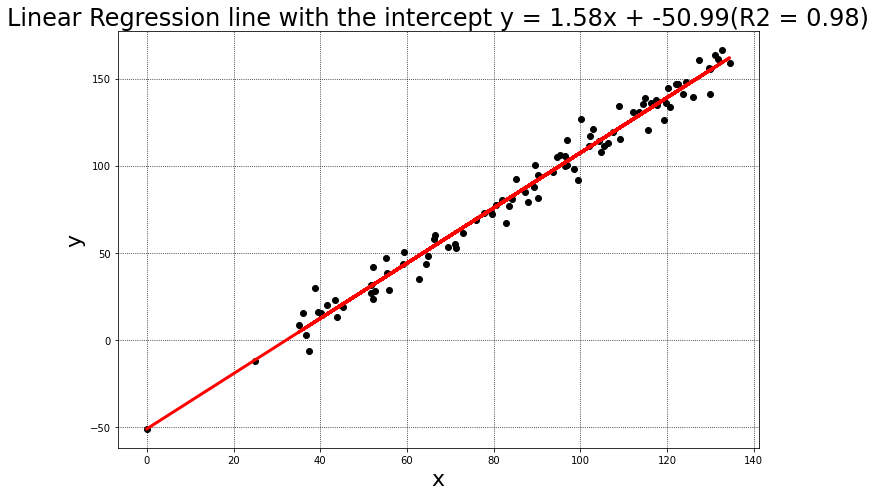

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7) )
ax.scatter(x,y,color='black')
ax.plot(x, reg.predict(x), color='red', linewidth= 3)
ax.grid(True,
       axis = 'both',
       zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 10)
ax.set_xlabel('x', fontsize = 22)
ax.set_ylabel('y', fontsize = 22)
ax.set_title("Linear Regression line with the intercept y = {:.2f}x + {:.2f}(R2 = {:.2f})".format(m, b, score), fontsize = 24)
fig.tight_layout()